### Class
클래스(Class)는 객체를 만들 수 있는 틀

### Object
객체(Object)는 '성질'과 '할 수 있는 행동'이 담긴 자료
* 이때 ‘성질’에 해당하는 것을 필드(Field)라 하고, 이는 객체가 가지고 있는 변수에 해당
* '할 수 있는 행동'에 해당하는 것을 메소드(Method)라 하고, 이는 객체가 동작시킬 수 있는 함수에 해당

### Instance
인스턴스(instance)는 객체를 만들 수 있는 틀(클래스)로 찍어낸 객체


#### 선형 회귀 직선의 수식
y=W∗X+b

* tf.square() : 텐서플로우에서 제곱 
* tf.reduce_mean() : 평균
* self : 메소드라면 가져야 할 첫번째 매개변수
* def \__init__\(self): 
    * 클래스의 초기 인스턴스를 설정해주는 부분
    * 클래스에서 사용되는 변수들의 초기값

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

### 선형 회귀 모델 클래스

In [4]:
np.random.seed(100)

class LinearModel:
    def __init__(self):
        self.W = tf.Variable(1.5) # 가중치 초기값
        
        self.b = tf.Variable(1.5) # Bias 초기값
        
    def __call__(self,X,Y):
        
        return tf.add(tf.multiply(X,self.W),self.b)

### 손실 함수 (MSE)

In [5]:
def loss(y, pred):
    # 차이 제곱의 평균 값
    return tf.reduce_mean(tf.square(y -pred))

### train 함수 

In [7]:
def train(linear_model, x, y):
    
    with tf.GradientTape() as t:
        current_loss = loss(y, linear_model(x, y))
        
    
    # learning_rate 
    learning_rate = 0.001
    
    # gradient 
    delta_W, delta_b = t.gradient(current_loss, [linear_model.W, linear_model.b])
    
    # learning rate 와 계산한 gradient 값을 이용하여 업데이트할 파라미터 변화 값 계산
    W_update = (learning_rate * delta_W)
    b_update = (learning_rate * delta_b)
    
    return W_update, b_update

Epoch count 0: Loss value: 253.76422119140625
W: 1.6790976524353027, b: 1.5266597270965576
Epoch count 20: Loss value: 29.36901092529297
W: 3.520009994506836, b: 1.7994016408920288
Epoch count 40: Loss value: 16.428808212280273
W: 3.9623730182647705, b: 1.8629413843154907
Epoch count 60: Loss value: 15.682289123535156
W: 4.06889009475708, b: 1.8762634992599487
Epoch count 80: Loss value: 15.638932228088379
W: 4.09475564956665, b: 1.8775460720062256


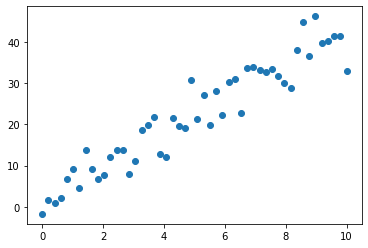

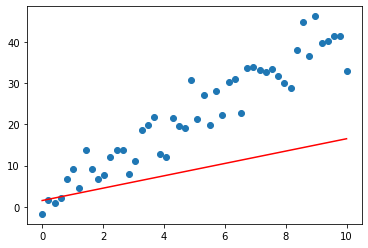

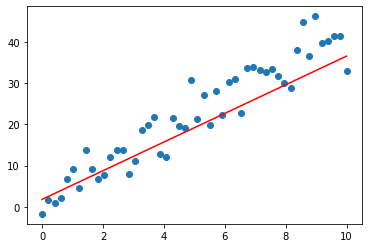

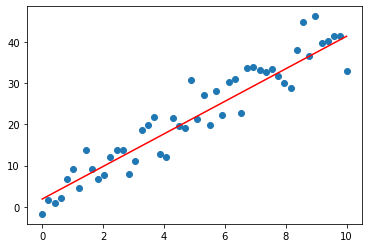

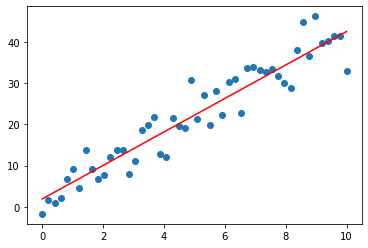

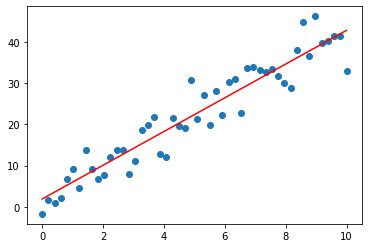

In [9]:
def main():
    
    # 데이터 생성 
    x_data = np.linspace(0, 10, 50)
    y_data = 4 * x_data + np.random.randn(*x_data.shape)*4 + 3
    
    # 데이터 출력 
    plt.scatter(x_data,y_data)
    plt.savefig('data.png')
    
    # 선형 함수 적용
    linear_model = LinearModel()
    
    # epochs  
    epochs = 100
    
    # epoch 값만큼 모델 학습
    for epoch_count in range(epochs):
        
        # 선형 모델의 예측 값 저장
        y_pred_data=linear_model(x_data, y_data)
        
        # 예측 값과 실제 데이터 값과의 loss 함수 값 저장
        real_loss = loss(y_data, linear_model(x_data, y_data))
        
        # 현재의 선형 모델을 사용하여  loss 값을 줄이는 새로운 파라미터로 갱신할 파라미터 변화 값을 계산
        update_W, update_b = train(linear_model, x_data, y_data)
        
        # 선형 모델의 가중치와 Bias를 업데이트합니다. 
        linear_model.W.assign_sub(update_W)
        linear_model.b.assign_sub(update_b)
        
        # 20번 마다 출력 (조건문 변경 가능)
        if (epoch_count % 20 == 0):
            print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")
            print('W: {}, b: {}'.format(linear_model.W.numpy(), linear_model.b.numpy()))
            
            fig = plt.figure()
            ax1 = fig.add_subplot(111)
            ax1.scatter(x_data,y_data)
            ax1.plot(x_data,y_pred_data, color='red')
            plt.savefig('prediction.png')

if __name__ == "__main__":
    main()